In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Latex
from utils import *

import warnings
warnings.filterwarnings('ignore')

init_printing(use_latex='mathjax')

<h1><center>Lengyel and Epstein model</center> </h1>

## Introduction

In this section, we will apply the result of the previous section on the Brusselator model. To speed up the calculation, we will use the _sympy_ library that provides the symbolic computation for Python. This way, we can derive the result quickly and fast.
In each cell, we might use some commands from _sympy_ (explained by a comment) or the following command:

__lprint__: Print a string into the ouput that has one or placeholders for latex scripts.

Below are some examples

In [2]:
lprint(lprint("The fraction is {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}"))
lprint(r"$This \, is \, \pi \, in \,$ sympy: {0}", pi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Lengyel and Epstein PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u =\frac{1}{\sigma}\left((\partial_x^2 + \partial_y^2)u + a - u - 4 \frac{uv}{1 + u^2}\right)$</center></h3>

<h3><center>$\partial_t v = d (\partial_x^2 + \partial_y^2)v + b \left(u - \frac{uv}{1 + u^2}\right)$</center></h3>

for diffusion constants $d$, $1/\sigma$, and model parameters $a, b > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = \frac{a}{\sigma} - \frac{u}{\sigma} - \frac{4}{\sigma}\frac{uv}{1 + u^2}$</center></h3>
<h3><center>$g(u,v) = bu - b \frac{uv}{1 + u^2}$</center></h3>

To start with __sympy__, we must define the list of parameters that will be used as symbol.

In [3]:
a, b, d, sigma, u, v, k = symbols('a, b, d, sigma, u, v, k', real=True)
#k = symbols('k', integer=True)

Next, we can define the kinetic terms, $f(u, v)$ and $g(u, v)$ for parameters $(sigma, d, a, b)$

In [4]:
# define kinteic terms symbolically in sympy
f = a / sigma - u / sigma  - (4 / sigma) * (u * v / (1 + u**2))
g = b * u - b * (u * v / (1 + u**2))
# print their form
lprint("$f(u,v) = $ {0}", f)
lprint("$g(u,v) = $ {0}",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

and mixing them as a vector is using _Matrix_ method like

In [5]:
Kinetic = Matrix(
    [[f], 
     [g]])
lprint(r"$\boldsymbol{f}(u, v) = $ {0}", Kinetic)

<IPython.core.display.Latex object>

After that, we need to find the steady state solutions of the system without diffusion by solving the following nonlinear equations

<center>$f(u,v) = \frac{a}{\sigma} - \frac{u}{\sigma} - \frac{4}{\sigma}\frac{uv}{1 + u^2} = 0$</center>
<center>$g(u,v) = bu - b \frac{uv}{1 + u^2} = 0$</center>

The solution of the above equations, dented by $u^*$ and $v^*$, is such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>

In _sympy_ it we can solve the system symbolicly by using the _solve_ function

In [6]:
# finding the steady state of the system, which
# is the solution of the system with respect to u and v
u_star, v_star = solve(Kinetic, (u, v))[0]
lprint("$u^* = $ {0}", u_star)
lprint("$v^* = $ {0}", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Next, to linearise the PDE system, we must derive the Jacobian of $(f, g)$ that is evaluated at $(u^*, v^*)$ 

# Important note: $\boldsymbol{J_0}$ is multiplyed by a positive value $25(\frac{a^2}{25} + 1)$

In [7]:
# Find the jacobian of the vectorised kinetic terms w.r.t. u and v
J_0 = Kinetic.jacobian([u, v])
# Print the jacobian
lprint(r"$J_0= \frac{\partial \boldsymbol{f}_i}{\partial u_j} =$ {0} ", J_0)
# Evaluate the jacobian at the stationary solution
J_0 = J_0.subs([(u, u_star), (v, v_star)])
J_0 = simplify(25*(a**2/25 + 1)*J_0.subs([(u, u_star), (v, v_star)]))
# print the jacobian at the stationary solution
lprint("$J_0|_{(u^*, v^*)} =$ {0}", J_0)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eigenvalues of the resulting matrix in terms of parameters $a$ and $b$ derives by calling _eigenvals_ function

In [8]:
# Deriving eigenvalues of the jacobian in terms of parameter a and b
λ_0_1, λ_0_2 =  list(J_0.eigenvals().keys())
lprint("$\lambda^{(0)}_1 =$ {0}", λ_0_1)
lprint("$\lambda^{(0)}_2 =$ {0}", λ_0_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can find the region of the $(a, b)$ plan where both $\lambda_1$ and $\lambda_2$ are negative (Turing stability) or directly use the inequalities we saw in the previous section.
Here, we try both of them and get exactly the same result.

In [9]:
# Find the trace and determinant of J_0 symbolically
cond_1 = J_0.trace()#simplify(v_star*J_0.trace())
cond_2 = sigma*J_0.det()#simplify(sigma*v_star*J_0.det())
lprint(r"Condition 1: {0} $< 0$", cond_1)
lprint(r"Condition 2: {0} $> 0$", cond_2)
# convert the symbolic trace and determinants to numpy functions
cond_1_f = lambdify([a, b, sigma], cond_1, modules='numpy')
cond_2_f = lambdify([a, b], cond_2, modules='numpy')
# convert the symbolic lambda_2 to a numpy function
λ_0_2_f = lambdify([a, b], λ_0_2, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

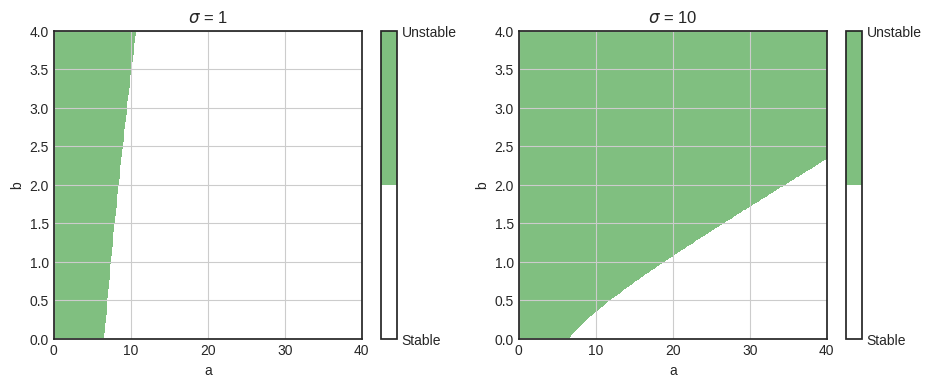

In [10]:

# Create a meshgrid [-4, 4]x[-2, 4] for (a, b) domain
L_a = 40
L_b = 4
a_size = 400
b_size = 400
a_axis = L_a * np.linspace(0, 1, a_size)
b_axis = L_b * np.linspace(0, 1, b_size)
a_grid, b_grid = np.meshgrid(a_axis, b_axis, sparse=False)
# Plotting
fig = plt.figure(figsize=(11,4))
plt.style.use('seaborn-white')
ax = fig.add_subplot(121)
sigma_value = 1
ax.set_title(r"$\sigma$ = " f"{sigma_value}")

# Numerically calculate the values of the conditions
domain = cond_1_f(a_grid , b_grid, sigma_value) < 0
domain2 = cond_2_f(a_grid , b_grid) > 0
domain_res = np.bool8(domain) & np.bool8(domain2)
# plot the domain by using zero as the levelset
plot_two_levels(ax, domain_res.astype(np.float32), [0, L_a, 0, L_b], "a", "b", 0, ['Stable', 'Unstable'],aspect=L_a/L_b)

ax = fig.add_subplot(122)
sigma_value = 10
ax.set_title(r"$\sigma$ = " f"{sigma_value}")

# Numerically calculate the values of the condition one
domain = cond_1_f(a_grid , b_grid, sigma_value) < 0
domain2 = cond_2_f(a_grid , b_grid) > 0
domain_res = np.bool8(domain) & np.bool8(domain2)
# plot the domain by using zero as the levelset
plot_two_levels(ax, domain_res.astype(np.float32), [0, L_a, 0, L_b], "a", "b", 0, ['Stable', 'Unstable'],aspect=L_a/L_b)
#plt.tight_layout()
plt.show()

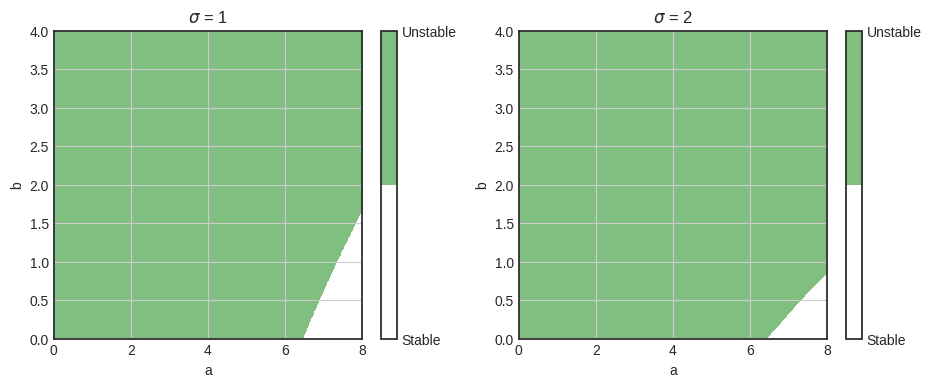

In [12]:

# Create a meshgrid [-4, 4]x[-2, 4] for (a, b) domain
L_a = 8
L_b = 4
a_size = 400
b_size = 400
a_axis = L_a * np.linspace(0, 1, a_size)
b_axis = L_b * np.linspace(0, 1, b_size)
a_grid, b_grid = np.meshgrid(a_axis, b_axis, sparse=False)
# Plotting
fig = plt.figure(figsize=(11,4))
plt.style.use('seaborn-white')
ax = fig.add_subplot(121)
sigma_value = 1
ax.set_title(r"$\sigma$ = " f"{sigma_value}")

# Numerically calculate the values of the conditions
domain = cond_1_f(a_grid , b_grid, sigma_value) < 0
domain2 = cond_2_f(a_grid , b_grid) > 0
domain_res = np.bool8(domain) & np.bool8(domain2)
# plot the domain by using zero as the levelset
plot_two_levels(ax, domain_res.astype(np.float32), [0, L_a, 0, L_b], "a", "b", 0, ['Stable', 'Unstable'],aspect=L_a/L_b)

ax = fig.add_subplot(122)
sigma_value = 2
ax.set_title(r"$\sigma$ = " f"{sigma_value}")

# Numerically calculate the values of the condition one
domain = cond_1_f(a_grid , b_grid, sigma_value) < 0
domain2 = cond_2_f(a_grid , b_grid) > 0
domain_res = np.bool8(domain) & np.bool8(domain2)
# plot the domain by using zero as the levelset
plot_two_levels(ax, domain_res.astype(np.float32), [0, L_a, 0, L_b], "a", "b", 0, ['Stable', 'Unstable'],aspect=L_a/L_b)
#plt.tight_layout()
plt.show()

Including the diffusion, the matrix $\boldsymbol{J}$ defines as
<center>$\boldsymbol{J} = \boldsymbol{J_0} - k^2 \boldsymbol{D}$</center>
and we can use _sympy_ to find its egenvalues symbolically as follows:

In [13]:
# Define J 
J = J_0 - Matrix([[k**2/sigma, 0       ], 
                  [0,        d*k**2]])
# print its form
lprint(r"$\boldsymbol{J}$ = {0}", J)
# Find its eigenvalues
λ_1, λ_2 =  list(J.eigenvals().keys())
lprint("$\lambda_1 = $ {0}", λ_1)
lprint("$\lambda_2 = $ {0}", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

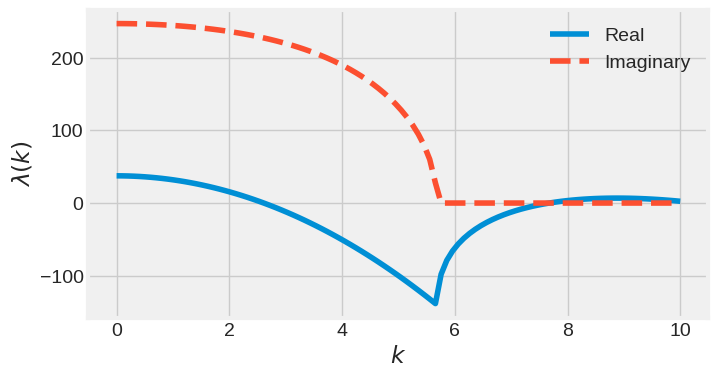

In [14]:
ks = np.complex64(np.linspace(0, 10, num=100))

λ_2_f = lambdify([k, a, b, sigma, d], λ_2, modules='numpy')
λ_2_graph = λ_2_f(ks, a =10, b = 2, sigma = 1, d = 10)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

#k_c_f = lambdify([a, b, sigma, d], k_c, modules='numpy')
#k_critical = k_c_f(a = 1, b = 2, sigma = 1, d = 10)
#plt.vlines(k_critical, -1 , 1, color='magenta', linestyle='-', alpha=.5,
#           label=r"$k_c$")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

In [15]:
f_u = J_0[0, 0]
f_v = J_0[0, 1]
g_u = J_0[1, 0]
g_v = J_0[1, 1]

lprint(r"$f_u$={0}", f_u)
lprint(r"$f_v$={0}", f_v)
lprint(r"$g_u$={0}", g_u)
lprint(r"$g_v$={0}", g_v)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### combining all the conditions together

Previously, we saw that for the Lengyel-Epstein model
<h4><center>$det(\boldsymbol{J_0}) = f_u g_v - f_v g_u = ab > 0$</center></h4>

is always true. So, it remains three inequalities that together determine the Turing space of parameters:

<h3><center>$f_u + g_v < 0$,</center></h3>
<h4><center>$ d f_u +  g_v/\sigma > 0$,</center></h4>
<h4><center>$(d f_u + g_v/\sigma)^2 > (4d/\sigma) (f_u g_v - f_v g_u)$,</center></h4>

In [16]:
cond_3 = simplify(sigma*(d*f_u + g_v/sigma))#f_u + δ * g_v
cond_4 = simplify(sigma**2*(a**2 + 25)**2*(cond_3**2 - (4*d/sigma)*J_0.det())) #cond_3**2 - 4 * δ * J_0.det()
lprint(r"Condition 3: {0}$ > 0$ ", cond_3)
lprint(r"Condition 4: {0}$ > 0$ ", cond_4)
# convert the conditions to numpy functions
cond_3_f = lambdify([a, b, d], cond_3, modules='numpy')
cond_4_f = lambdify([a, b, d, sigma], cond_4, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Using the function of all three conditions (inequalities), the following code iterates on a list of $\delta \in \{.5, .3, .2, .1, .05, 0.001\}$ for $(A, B) \in [-4, 4]x[-2, 4]$ plane, and then calculate the three conditions for each $(\delta, A, B)$. Note that the results are True/False values that a __bitwise AND__ operation on all of them is True, whenever all are satisfied and True. Finally, the intersected domain (base on __bitwise AND__ operation) is plotted for the given $\delta$.

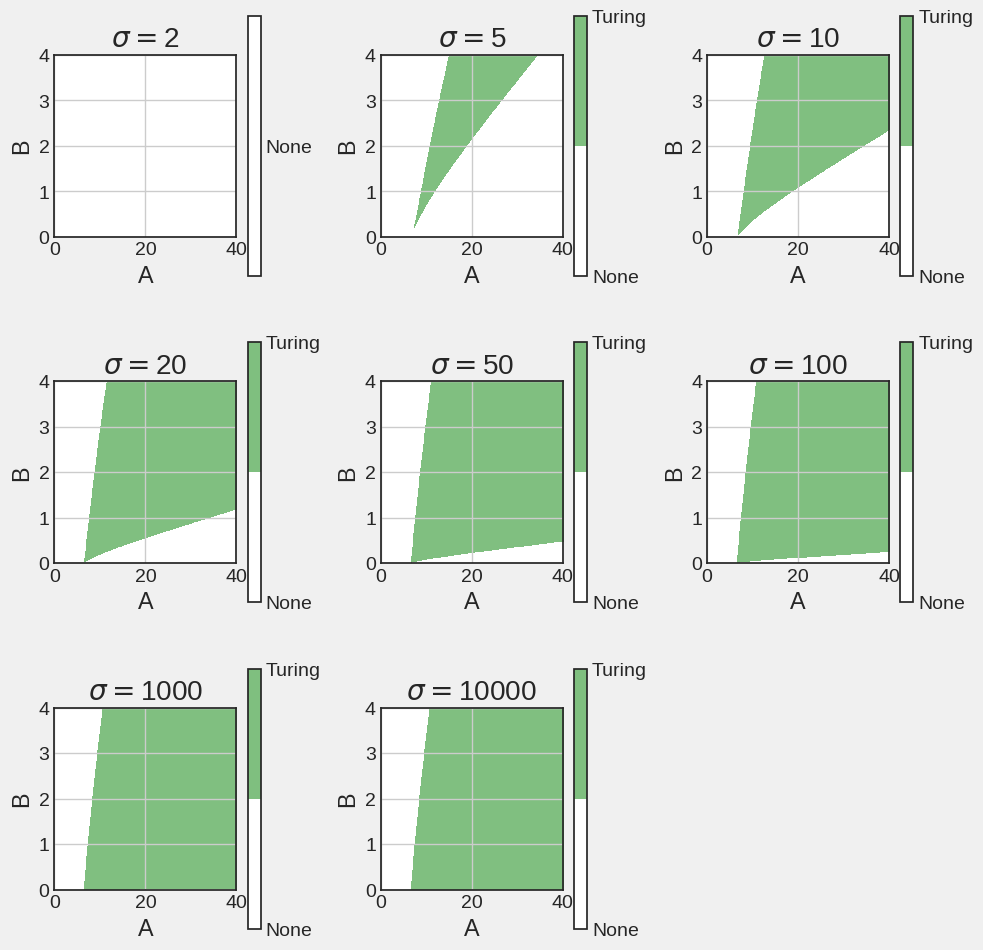

In [17]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_a = 40
L_b = 4
a_size = 400
b_size = 400
a_axis = L_a * np.linspace(0, 1, a_size)
b_axis = L_b * np.linspace(0, 1, b_size)
a_grid, b_grid = np.meshgrid(a_axis, b_axis, sparse=False)

d_value = 1
sigma_values = np.array([2, 5, 10, 20, 50, 100, 1000, 10000])
# Plotting
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-white')

for i, sigma_val in enumerate(sigma_values):
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_title(r"$\sigma=$" f"{sigma_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(a_grid , b_grid, d_value)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(a_grid , b_grid, d_value, sigma_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(a_grid , b_grid, sigma_val)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [0, L_a, 0, L_b], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'],
                   aspect=L_a/L_b)

plt.tight_layout()
plt.show()

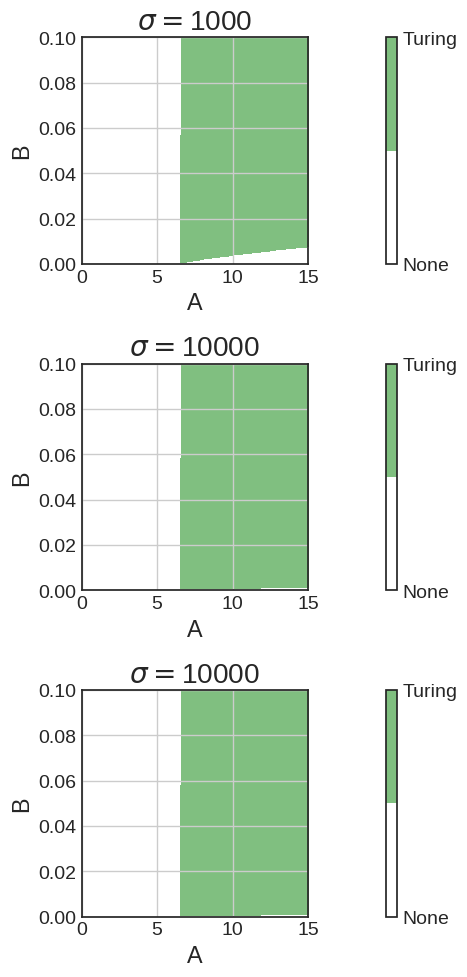

In [18]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_a = 15
L_b = .1
a_size = 400
b_size = 400
a_axis = L_a * np.linspace(0, 1, a_size)
b_axis = L_b * np.linspace(0, 1, b_size)
a_grid, b_grid = np.meshgrid(a_axis, b_axis, sparse=False)

d_value = 1
sigma_values = np.array([ 1000, 10000, 10000])
# Plotting
fig = plt.figure(figsize=(16,10))
plt.style.use('seaborn-white')

for i, sigma_val in enumerate(sigma_values):
    ax = fig.add_subplot(3, 1, i+1)
    ax.set_title(r"$\sigma=$" f"{sigma_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(a_grid , b_grid, d_value)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(a_grid , b_grid, d_value, sigma_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(a_grid , b_grid, sigma_val)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [0, L_a, 0, L_b], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'],
                   aspect=L_a/L_b)

plt.tight_layout()
plt.show()

# Using Gershgoring Theorem to excludes some art of parameter region

In [19]:
def gershgoring_cond_1(a, sigma):
    return (3 * a**2 - 20 * a - 125)/(sigma * a * (2 * a -5)) 

def gershgoring_cond_2(a, sigma):
    return (3 * a**2 - 125)/(2 * sigma * a **2) 

def gershgoring_cond_3(a, sigma):
    return (125 - 3 * a**2)/(2 * sigma * a **2) 

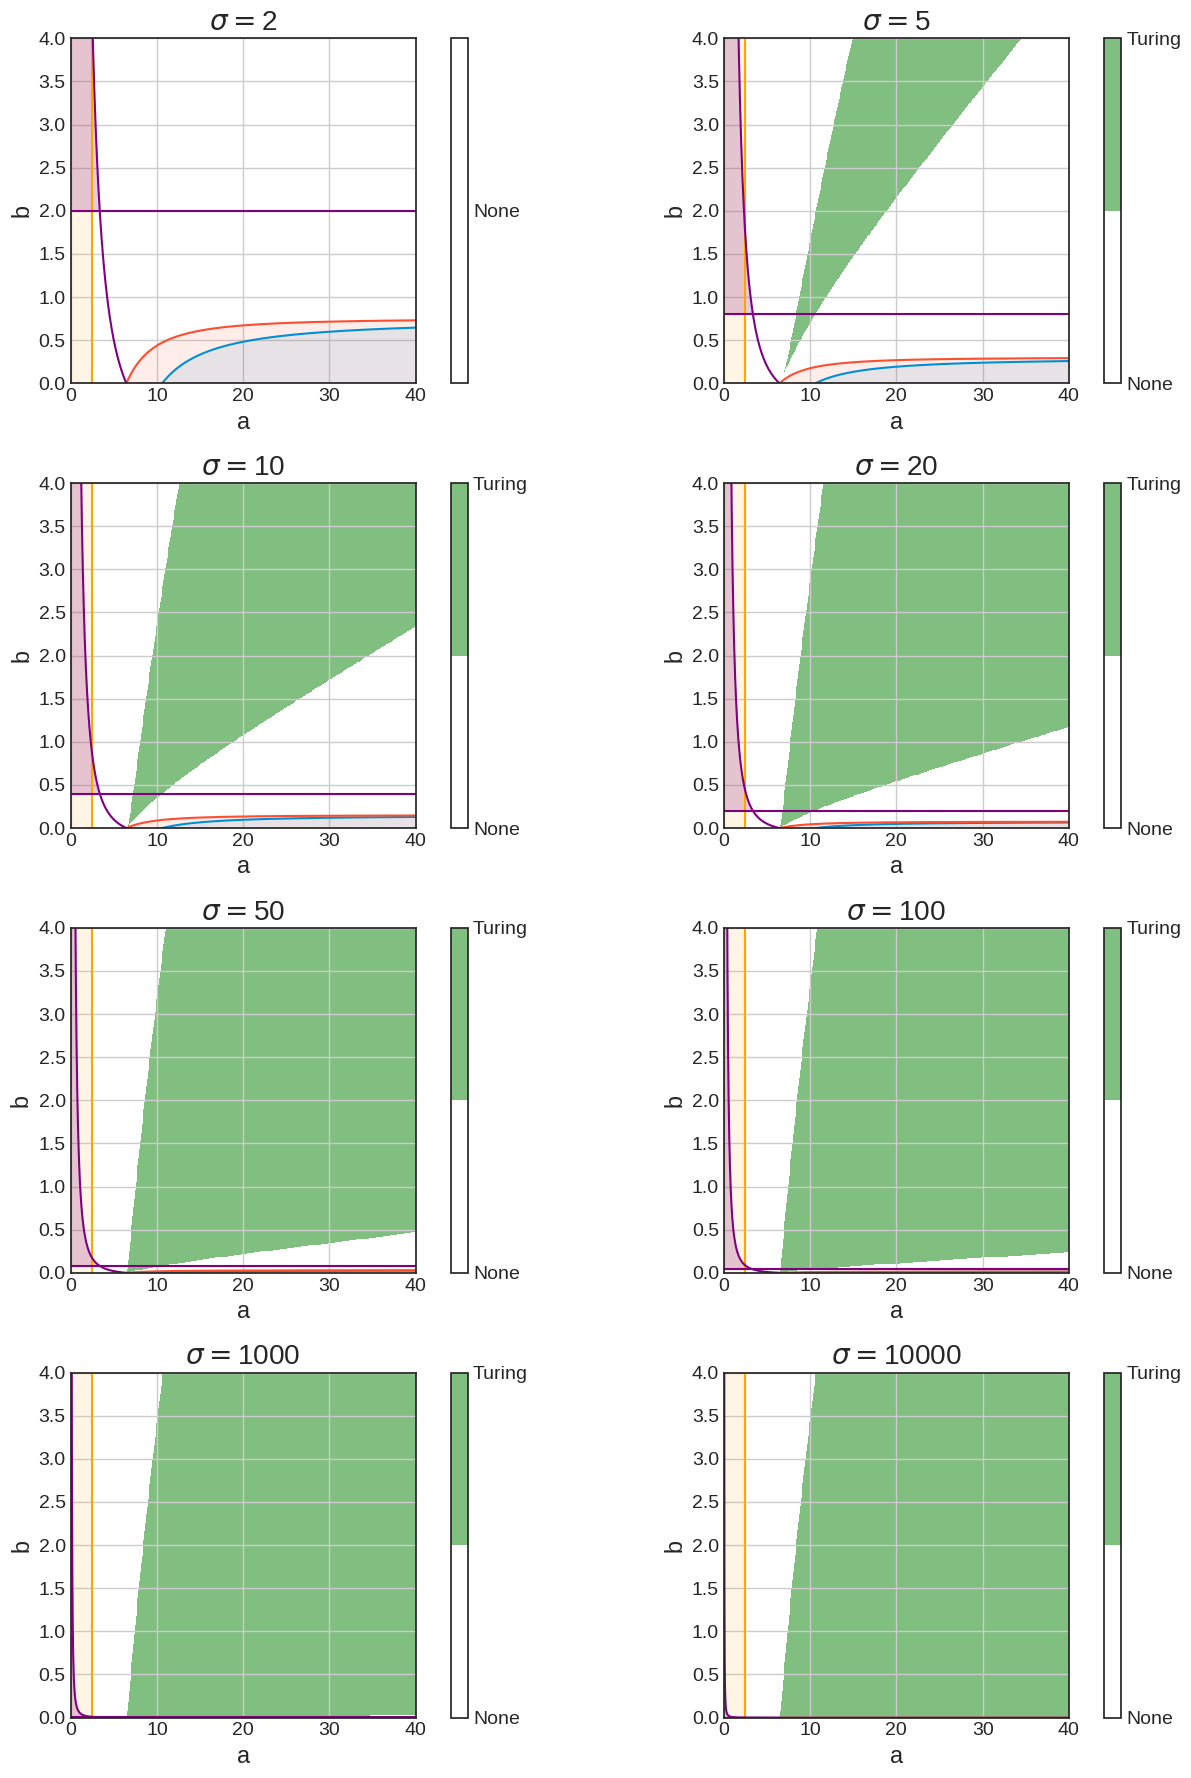

In [20]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_a = 40
L_b = 4
a_size = 400
b_size = 400
a_axis = L_a * np.linspace(0, 1, a_size)
b_axis = L_b * np.linspace(0, 1, b_size)
a_grid, b_grid = np.meshgrid(a_axis, b_axis, sparse=False)

d_value = 1
sigma_values = np.array([2, 5, 10, 20, 50, 100, 1000, 10000])
# Plotting
fig = plt.figure(figsize=(14,18))
plt.style.use('seaborn-white')

for i, sigma_val in enumerate(sigma_values):
    ax = fig.add_subplot(4, 2, i+1)
    ax.set_title(r"$\sigma=$" f"{sigma_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(a_grid , b_grid, d_value)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(a_grid , b_grid, d_value, sigma_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(a_grid , b_grid, sigma_val)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [0, L_a, 0, L_b], 
                    "a", "b", 
                    0, 
                    ['None', 'Turing'],
                   aspect=L_a/L_b)
    a_axis_2 = np.linspace(np.sqrt(125/3), L_a, a_size)
    a_axis_3 = np.linspace(0, np.sqrt(125/3), a_size)
    a_axis_4 = np.linspace(0, np.sqrt(125/11), a_size)
    
    plt.plot(a_axis_2, gershgoring_cond_1(a_axis_2, sigma_val), linewidth=1.5)
    plt.fill_between(a_axis_2, gershgoring_cond_1(a_axis_2, sigma_val), 0, alpha=.1)
    plt.plot(a_axis_2, gershgoring_cond_2(a_axis_2, sigma_val), linewidth=1.5)
    plt.fill_between(a_axis_2, gershgoring_cond_2(a_axis_2, sigma_val), 0, alpha=.1)
    
    plt.vlines(2.5, 0, L_b, linewidth=1.5, color='orange')
    plt.fill_betweenx(b_axis, 0, 5/2, alpha=.1, color='orange')
    plt.hlines(4/sigma_val, 0, L_a, linewidth=1.5, color='purple')
    plt.plot(a_axis_3, gershgoring_cond_3(a_axis_3, sigma_val), linewidth=1.5, color='purple')
    plt.fill_between(a_axis_4, gershgoring_cond_3(a_axis_4, sigma_val), 4/sigma_val, alpha=.2, color='purple')
    plt.ylim(0, L_b)
    plt.xlim(0, L_a)

plt.tight_layout()
plt.show()

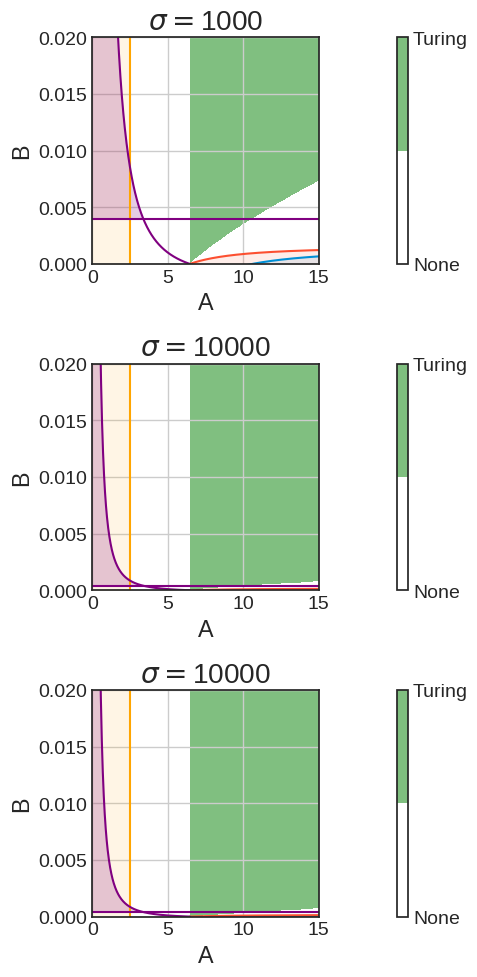

In [21]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_a = 15
L_b = .02
a_size = 400
b_size = 400
a_axis = L_a * np.linspace(0, 1, a_size)
b_axis = L_b * np.linspace(0, 1, b_size)
a_grid, b_grid = np.meshgrid(a_axis, b_axis, sparse=False)

d_value = 1
sigma_values = np.array([ 1000, 10000, 10000])
# Plotting
fig = plt.figure(figsize=(16,10))
plt.style.use('seaborn-white')

for i, sigma_val in enumerate(sigma_values):
    ax = fig.add_subplot(3, 1, i+1)
    ax.set_title(r"$\sigma=$" f"{sigma_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(a_grid , b_grid, d_value)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(a_grid , b_grid, d_value, sigma_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(a_grid , b_grid, sigma_val)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [0, L_a, 0, L_b], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'],
                   aspect=L_a/L_b)
    a_axis_2 = np.linspace(np.sqrt(125/3), L_a, a_size)
    a_axis_3 = np.linspace(0, np.sqrt(125/3), a_size)
    a_axis_4 = np.linspace(0, np.sqrt(125/11), a_size)
    
    plt.plot(a_axis_2, gershgoring_cond_1(a_axis_2, sigma_val), linewidth=1.5)
    plt.fill_between(a_axis_2, gershgoring_cond_1(a_axis_2, sigma_val), 0, alpha=.1)
    plt.plot(a_axis_2, gershgoring_cond_2(a_axis_2, sigma_val), linewidth=1.5)
    plt.fill_between(a_axis_2, gershgoring_cond_2(a_axis_2, sigma_val), 0, alpha=.1)
    
    plt.vlines(2.5, 0, L_b, linewidth=1.5, color='orange')
    plt.fill_betweenx(b_axis, 0, 5/2, alpha=.1, color='orange')
    plt.hlines(4/sigma_val, 0, L_a, linewidth=1.5, color='purple')
    plt.plot(a_axis_3, gershgoring_cond_3(a_axis_3, sigma_val), linewidth=1.5, color='purple')
    plt.fill_between(a_axis_4, gershgoring_cond_3(a_axis_4, sigma_val), 4/sigma_val, alpha=.2, color='purple')
    plt.ylim(0, L_b)
    plt.xlim(0, L_a)


plt.tight_layout()
plt.show()

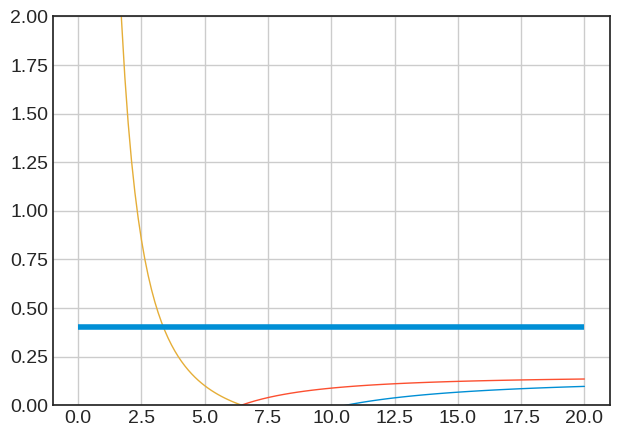

In [237]:
sigma=10
xs = np.linspace(np.sqrt(125/3), 20)
xs2 = np.linspace(0, np.sqrt(125/3))

plt.plot(xs, gershgoring_cond_1(xs, sigma), linewidth=1)
plt.plot(xs, gershgoring_cond_2(xs, sigma), linewidth=1)
plt.plot(xs2, gershgoring_cond_3(xs2, sigma), linewidth=1)
plt.hlines(4/sigma, 0, 20)
plt.ylim(0, 2)
plt.grid()